# A simple notebook to compute some statistics about theses in DiVA examined by G. Q. Maguire Jr.

The program fetches data from DiVA as a feed, using the URL shown as 'url' below. Unlike the previous program, this program fetches the data as a CSV feed (specifically "CSV all metadata version 2").

Note that a lot of replacements are done to the string returned by DiVA due to a bit of LaTeX in the abstracts (that should not be there as this should have been turned to HTML) and the problem of newlines in the abstracts.

In [1]:
# compute statistics over thesis data from DiVA Start
# libraries
import json
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
from io import StringIO

# define a function to computer lower case Roman numeras from an integer
def int_to_roman(num):
    res = ""
    table = [
        (1000, "m"),
        (900, "cm"),
        (500, "d"),
        (400, "cd"),
        (100, "c"),
        (90, "xc"),
        (50, "l"),
        (40, "xl"),
        (10, "x"),
        (9, "ix"),
        (5, "v"),
        (4, "iv"),
        (1, "i"),
    ]
    for cap, roman in table:
        d, m = divmod(num, cap)
        res += roman * d
        num = m
    return res

# Using the above function fill a dict with the lower case Roman numerals from 0 to 499
roman_table=dict()
for i in range(0,500):
    roman_table[int_to_roman(i)]=i


# URL of the DiVA feed
# The starting year is arbitrarly fixed to 1990 - as I had no degree projects a KTH prior to this.
current_year = date.today().year
examiner='maguire'
# the maximum number of theses was arbitrarily set to 5000
url='https://kth.diva-portal.org/smash/export.jsf?format=csvall2&addFilename=true&aq=[[{"examiner":["maguire"]}]]&aqe=[]&aq2=[[{"dateIssued":{"from":"1990","to":"2022"}},{"publicationTypeCode":["studentThesis"]}]]&onlyFullText=false&noOfRows=5000&sortOrder=title_sort_asc&sortOrder2=title_sort_asc'

req = urllib.request.Request(url)
resource=urllib.request.urlopen(req)
data_str=StringIO(resource.read().decode(resource.headers.get_content_charset()))

# do some data cleanup
#data_str=data_str.replace('\n', '\\n')
#data_str=data_str.replace('\\hbox', '\\\\hbox')
#data_str=data_str.replace('\\(', '(')
#data_str=data_str.replace('\\)', ')')
#data_str=data_str.replace('\\approx', '~')
#data_str=data_str.replace('\\%', '%')
#data_str=data_str.replace('\t', '')
#data_str=data_str.replace('\\Omega', 'Omega')

#data = json.loads(data_str)
#df = pd.DataFrame(data)
df=pd.read_csv(data_str, sep=",")
#print(df.head())

for idx, row in df.iterrows():
    pages=row['Pages']
    if isinstance(pages, str) and ',' in pages:
        #print(pages)
        preface, body = pages.split(',')
        df.loc[idx, 'total_pages']=roman_table[preface]+int(body)
    elif isinstance(pages, str) and '.' in pages:
        print(pages)
        preface, body = pages.split('.')
        df.loc[idx, 'total_pages']=roman_table[preface]+int(body)
    elif isinstance(pages, str):
        df.loc[idx, 'total_pages']=int(pages)
    else:
        df.loc[idx, 'total_pages']=0


# show the total_pages values as a plot
bins=[]
for b in range(0, round(int(df['total_pages'].max()+50), -1), 10):
    bins.append(b)
print("total_pages mas={}".format(df['total_pages'].max()))
#df[['total_pages']] = df[['total_pages']].apply(pd.to_numeric)
#hist_tp=plt.hist(df['total_pages'], bins=bins)
freq_df=pd.DataFrame(df['total_pages'].value_counts(bins=bins))
freq_df=freq_df.reset_index()
freq_df.columns=['number of pages', 'count']
for idx, row in freq_df.iterrows():
 	freq_df.loc[idx, 'base']=row['number of pages'].left

freq_df.sort_values(by='base', ignore_index=True, ascending=True)
freq_df = freq_df.drop('number of pages', axis=1)


xiii.48
total_pages mas=455.0


From the histogram below, we can see that there are a number of theses that did not have a length in DiVA and these have been interpreted has having zero, i.e., 0, lenght. One can easily see that the distribut is pretty well 

In [2]:
_deepnote_run_altair(freq_df, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"bin":false,"sort":{"order":"ascending","encoding":"x"},"type":"quantitative","field":"base","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [3]:
# Frequency
stats_df = df \
.groupby('total_pages') \
['total_pages'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'total_pages': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df

total_pages  frequency       pdf       cdf
0            0.0         36  0.061538  0.061538
1           16.0          1  0.001709  0.063248
2           18.0          2  0.003419  0.066667
3           24.0          3  0.005128  0.071795
4           26.0          1  0.001709  0.073504
..           ...        ...       ...       ...
131        251.0          1  0.001709  0.993162
132        269.0          1  0.001709  0.994872
133        271.0          1  0.001709  0.996581
134        377.0          1  0.001709  0.998291
135        455.0          1  0.001709  1.000000

[136 rows x 4 columns]

In [4]:
_deepnote_run_altair(stats_df, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"total_pages","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"pdf","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [5]:
_deepnote_run_altair(stats_df, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"total_pages","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"cdf","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [6]:
_deepnote_run_altair(df, """{"data":{"name":"placeholder"},"mark":{"type":"point","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Year","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"total_pages","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [7]:
_deepnote_run_altair(df, """{"data":{"name":"placeholder"},"mark":{"type":"point","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Year","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"total_pages","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

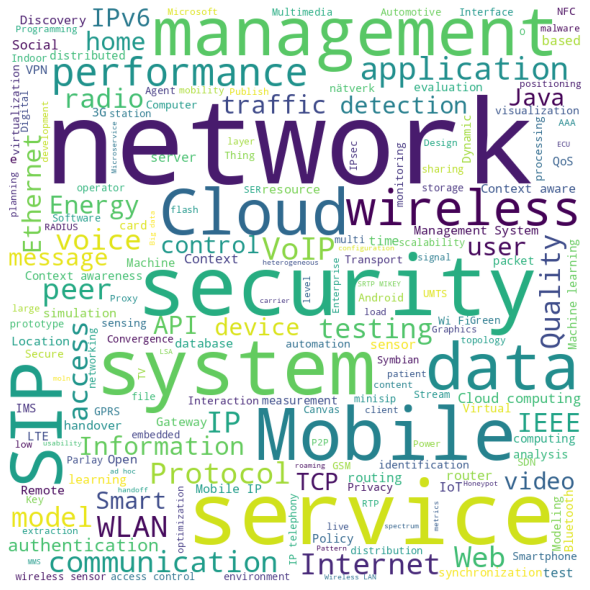

In [8]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('nan')

for val in df['Keywords']:
    val = str(val)
    # split the value
    tokens = val.split(';')
    number_of_tokens=len(tokens)
    # choose the first half of the tokens, as they are probably in the same language
    if number_of_tokens % 2 == 0:
        tokens=tokens[0:int(number_of_tokens/2)]
    # Converts each token into lowercase
    for i in range(len(tokens)):
        if any(map(str.isupper, tokens[i])):
            tokens[i] = tokens[i]
        else:
            tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

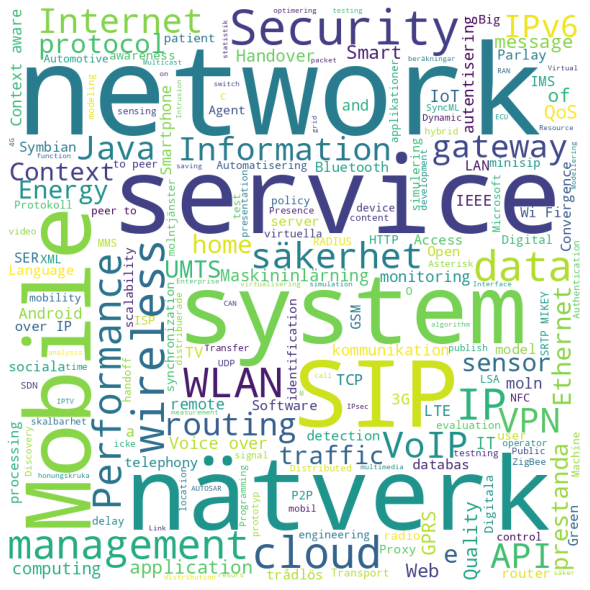

In [9]:
SwedishStopWords=[
    u'aderton',
    u'adertonde',
    u'adjö',
    u'aldrig',
    u'alla',
    u'allas',
    u'allt',
    u'alltid',
    u'alltså',
    u'än',
    u'andra',
    u'andras',
    u'annan',
    u'annat',
    u'ännu',
    u'artonde',
    u'artonn',
    u'åtminstone',
    u'att',
    u'åtta',
    u'åttio',
    u'åttionde',
    u'åttonde',
    u'av',
    u'även',
    u'båda',
    u'bådas',
    u'bakom',
    u'bara',
    u'bäst',
    u'bättre',
    u'behöva',
    u'behövas',
    u'behövde',
    u'behövt',
    u'beslut',
    u'beslutat',
    u'beslutit',
    u'bland',
    u'blev',
    u'bli',
    u'blir',
    u'blivit',
    u'bort',
    u'borta',
    u'bra',
    u'då',
    u'dag',
    u'dagar',
    u'dagarna',
    u'dagen',
    u'där',
    u'därför',
    u'de',
    u'del',
    u'delen',
    u'dem',
    u'den',
    u'deras',
    u'dess',
    u'det',
    u'detta',
    u'dig',
    u'din',
    u'dina',
    u'dit',
    u'ditt',
    u'dock',
    u'du',
    u'efter',
    u'eftersom',
    u'elfte',
    u'eller',
    u'elva',
    u'en',
    u'enkel',
    u'enkelt',
    u'enkla',
    u'enligt',
    u'er',
    u'era',
    u'ert',
    u'ett',
    u'ettusen',
    u'få ',
    u'fanns',
    u'får',
    u'fått ',
    u'fem',
    u'femte',
    u'femtio',
    u'femtionde',
    u'femton',
    u'femtonde',
    u'fick',
    u'fin',
    u'finnas',
    u'finns',
    u'fjärde',
    u'fjorton',
    u'fjortonde',
    u'fler',
    u'flera',
    u'flesta',
    u'följande',
    u'för',
    u'före',
    u'förlåt',
    u'förra',
    u'första',
    u'fram',
    u'framför',
    u'från',
    u'fyra',
    u'fyrtio',
    u'fyrtionde',
    u'gå',
    u'gälla',
    u'gäller',
    u'gällt',
    u'går',
    u'gärna',
    u'gått',
    u'genast',
    u'genom',
    u'gick',
    u'gjorde',
    u'gjort',
    u'god',
    u'goda',
    u'godare',
    u'godast',
    u'gör',
    u'göra',
    u'gott',
    u'ha',
    u'hade',
    u'haft',
    u'han',
    u'hans',
    u'har',
    u'här',
    u'heller',
    u'hellre',
    u'helst',
    u'helt',
    u'henne',
    u'hennes',
    u'hit',
    u'hög',
    u'höger',
    u'högre',
    u'högst',
    u'hon',
    u'honom',
    u'hundra',
    u'hundraen',
    u'hundraett',
    u'hur',
    u'i',
    u'ibland',
    u'idag',
    u'igår',
    u'igen',
    u'imorgon',
    u'in',
    u'inför',
    u'inga',
    u'ingen',
    u'ingenting',
    u'inget',
    u'innan',
    u'inne',
    u'inom',
    u'inte',
    u'inuti',
    u'ja',
    u'jag',
    u'jämfört',
    u'kan',
    u'kanske',
    u'knappast',
    u'kom',
    u'komma',
    u'kommer',
    u'kommit',
    u'kr',
    u'kunde',
    u'kunna',
    u'kunnat',
    u'kvar',
    u'länge',
    u'längre',
    u'långsam',
    u'långsammare',
    u'långsammast',
    u'långsamt',
    u'längst',
    u'långt',
    u'lätt',
    u'lättare',
    u'lättast',
    u'legat',
    u'ligga',
    u'ligger',
    u'lika',
    u'likställd',
    u'likställda',
    u'lilla',
    u'lite',
    u'liten',
    u'litet',
    u'man',
    u'många',
    u'måste',
    u'med',
    u'mellan',
    u'men',
    u'mer',
    u'mera',
    u'mest',
    u'mig',
    u'min',
    u'mina',
    u'mindre',
    u'minst',
    u'mitt',
    u'mittemot',
    u'möjlig',
    u'möjligen',
    u'möjligt',
    u'möjligtvis',
    u'mot',
    u'mycket',
    u'någon',
    u'någonting',
    u'något',
    u'några',
    u'när',
    u'nästa',
    u'ned',
    u'nederst',
    u'nedersta',
    u'nedre',
    u'nej',
    u'ner',
    u'ni',
    u'nio',
    u'nionde',
    u'nittio',
    u'nittionde',
    u'nitton',
    u'nittonde',
    u'nödvändig',
    u'nödvändiga',
    u'nödvändigt',
    u'nödvändigtvis',
    u'nog',
    u'noll',
    u'nr',
    u'nu',
    u'nummer',
    u'och',
    u'också',
    u'ofta',
    u'oftast',
    u'olika',
    u'olikt',
    u'om',
    u'oss',
    u'över',
    u'övermorgon',
    u'överst',
    u'övre',
    u'på',
    u'rakt',
    u'rätt',
    u'redan',
    u'så',
    u'sade',
    u'säga',
    u'säger',
    u'sagt',
    u'samma',
    u'sämre',
    u'sämst',
    u'sedan',
    u'senare',
    u'senast',
    u'sent',
    u'sex',
    u'sextio',
    u'sextionde',
    u'sexton',
    u'sextonde',
    u'sig',
    u'sin',
    u'sina',
    u'sist',
    u'sista',
    u'siste',
    u'sitt',
    u'sjätte',
    u'sju',
    u'sjunde',
    u'sjuttio',
    u'sjuttionde',
    u'sjutton',
    u'sjuttonde',
    u'ska',
    u'skall',
    u'skulle',
    u'slutligen',
    u'små',
    u'smått',
    u'snart',
    u'som',
    u'stor',
    u'stora',
    u'större',
    u'störst',
    u'stort',
    u'tack',
    u'tidig',
    u'tidigare',
    u'tidigast',
    u'tidigt',
    u'till',
    u'tills',
    u'tillsammans',
    u'tio',
    u'tionde',
    u'tjugo',
    u'tjugoen',
    u'tjugoett',
    u'tjugonde',
    u'tjugotre',
    u'tjugotvå',
    u'tjungo',
    u'tolfte',
    u'tolv',
    u'tre',
    u'tredje',
    u'trettio',
    u'trettionde',
    u'tretton',
    u'trettonde',
    u'två',
    u'tvåhundra',
    u'under',
    u'upp',
    u'ur',
    u'ursäkt',
    u'ut',
    u'utan',
    u'utanför',
    u'ute',
    u'vad',
    u'vänster',
    u'vänstra',
    u'var',
    u'vår',
    u'vara',
    u'våra',
    u'varför',
    u'varifrån',
    u'varit',
    u'varken',
    u'värre',
    u'varsågod',
    u'vart',
    u'vårt',
    u'vem',
    u'vems',
    u'verkligen',
    u'vi',
    u'vid',
    u'vidare',
    u'viktig',
    u'viktigare',
    u'viktigast',
    u'viktigt',
    u'vilka',
    u'vilken',
    u'vilket',
    u'vill',
    ]
    
swedish_comment_words = ''
stopwords = set(SwedishStopWords)
stopwords.add('nan')

for val in df['Keywords']:
    val = str(val)
    # split the value
    tokens = val.split(';')
    number_of_tokens=len(tokens)
    # choose the second half of the tokens, as they are probably in the same language
    if number_of_tokens % 2 == 0:
        tokens=tokens[int(number_of_tokens/2)+1:]
    # Converts each token into lowercase
    for i in range(len(tokens)):
        if any(map(str.isupper, tokens[i])):
            tokens[i] = tokens[i]
        else:
            tokens[i] = tokens[i].lower()
     
    swedish_comment_words += " ".join(tokens)+" "
 
swedishwordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(swedish_comment_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(swedishwordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [10]:
# do some statistics omn the dates: DefenceDate, CreatedDate,  and PublicationDate

number_with_defenceDate=0
number_with_createdDate=0
number_with_publicationDate=0

dates_df=pd.DataFrame({
    'PID': pd.Series(dtype='int'),
    'Year': pd.Series(dtype='int'),
    'DefenceDate': pd.Series(dtype='datetime64[ns]'),
    'CreatedDate': pd.Series(dtype='datetime64[ns]'),
    'PublicationDate': pd.Series(dtype='datetime64[ns]'),
    'delta_created': pd.Series(dtype='int'),
    'delta_publication': pd.Series(dtype='int')
})

for idx, row in df.iterrows():
    defense_date=None
    created_date=None
    publication_date=None
    year=None

    pid=str(row['PID'])
    dates_df.loc[idx,'PID']=int(pid)
    year=str(row['Year'])
    if year:
        dates_df.loc[idx,'Year']=int(year)

    defense_date_str=str(row['DefenceDate']) # will have the form: 2022-05-24T13:00
    if len(defense_date_str) == 16:
        # convert the string into a python date and time
        defense_date=datetime.strptime(defense_date_str, '%Y-%m-%dT%H:%M')
        dates_df.loc[idx,'DefenceDate']=defense_date
        number_with_defenceDate=number_with_defenceDate+1

    created_date_str=str(row['CreatedDate'])
    if len(created_date_str) == 10:
        #
        created_date=datetime.strptime(created_date_str, '%Y-%m-%d')
        dates_df.loc[idx,'CreatedDate']=created_date
        number_with_createdDate=number_with_createdDate+1

    publication_date_str=str(row['PublicationDate'])
    if len(publication_date_str) == 10:
        #
        publication_date=datetime.strptime(publication_date_str, '%Y-%m-%d')
        dates_df.loc[idx,'PublicationDate']=publication_date
        number_with_publicationDate=number_with_publicationDate+1
    
    if defense_date and created_date:
        dates_df.loc[idx,'delta_created']=int((created_date-defense_date).days)
    if created_date and publication_date:
        dates_df.loc[idx,'delta_publication']=int((publication_date-created_date).days)

print("number_with_defenceDate={0}, number_with_createdDate={1},number_with_publicationDate={2}".format(number_with_defenceDate, number_with_createdDate, number_with_publicationDate))
                     

number_with_defenceDate=533, number_with_createdDate=585,number_with_publicationDate=585


In [11]:
_deepnote_run_altair(dates_df, """{"data":{"name":"placeholder"},"mark":{"type":"point","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Year","scale":{"type":"time","zero":false}},"y":{"sort":null,"type":"quantitative","field":"delta_publication","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

As shown in the plot below, the time between the defense and the creation of the record in DiVA goes down rather rapidly in 2012, when I started putting all of the old theses that I had had into DiVA. After this point the time between the defence and the creation of a record in DiVA is very short (as will be shown in yet another plot). 

In [12]:
_deepnote_run_altair(dates_df, """{"data":{"name":"placeholder"},"mark":{"type":"point","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Year","scale":{"type":"time","zero":false}},"y":{"sort":null,"type":"quantitative","field":"delta_created","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [13]:
dates_df_since_2012=dates_df[dates_df['Year'] > 2012]
negative_dates=dates_df_since_2012[dates_df_since_2012['delta_created'] < 0]
negative_dates.head()

PID    Year         DefenceDate CreatedDate PublicationDate  \
333  727954.0  2014.0 2014-06-17 13:00:00  2012-10-31      2014-06-24   

     delta_created  delta_publication  
333         -595.0              601.0

Note that the thesis which has a created date 600 days before the oral presentation is likley to be an error in the data and it has been reported to the library.

In [14]:
_deepnote_run_altair(dates_df_since_2012, """{"data":{"name":"placeholder"},"mark":{"type":"point","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Year","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"delta_created","scale":{"type":"time","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

## Make a word cloud using the first title

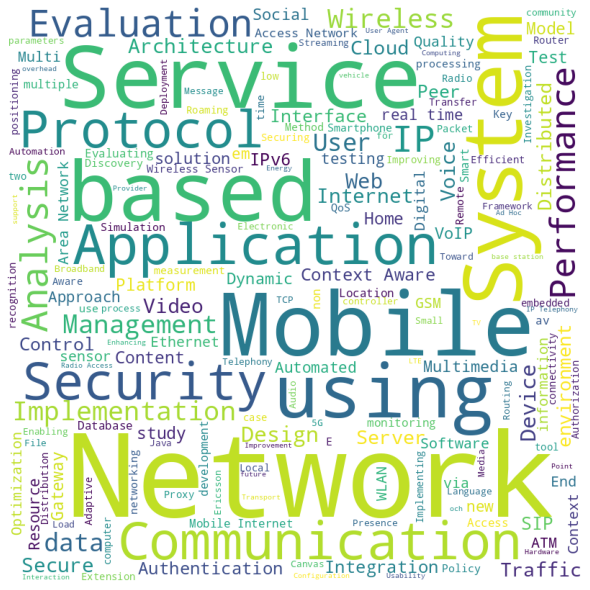

In [18]:
from wordcloud import WordCloud, STOPWORDS
title_comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('nan')

for val in df['Title']:
    val = str(val)
    # split the value first title (second title)
    openning_paren=val.find('(')
    ending_paren=val.find(')')
    if openning_paren > 0 and ending_paren > 0 and (ending_paren-openning_paren) > 0:
        tokens = val[0:openning_paren].split(' ')
    else:
        tokens = val.split(' ')

    number_of_tokens=len(tokens)
    #print("number_of_tokens={}".format(number_of_tokens))
    # Converts each token into lowercase
    for i in range(len(tokens)):
        if any(map(str.isupper, tokens[i])):
            tokens[i] = tokens[i]
        else:
            tokens[i] = tokens[i].lower()
     
    title_comment_words += " ".join(tokens)+" "
 
title_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(title_comment_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(title_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Make a word cloud using the second title

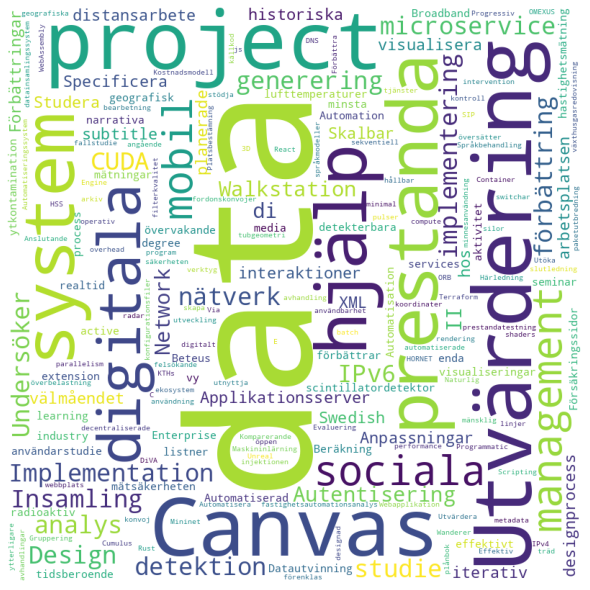

In [21]:
from wordcloud import WordCloud, STOPWORDS
title_comment_words = ''
stopwords = set(SwedishStopWords)
stopwords.update(set(STOPWORDS))
stopwords.add('nan')
stopwords.add('Language')
stopwords.add('Cooperative')

for val in df['Title']:
    val = str(val)
    # split the value first title (second title)
    openning_paren=val.find('(')
    ending_paren=val.find(')')
    if openning_paren > 0 and ending_paren > 0 and (ending_paren-openning_paren) > 0:
        tokens = val[openning_paren+1:ending_paren].split(' ')
    else:
        continue

    number_of_tokens=len(tokens)
    #print("number_of_tokens={}".format(number_of_tokens))
    # Converts each token into lowercase
    for i in range(len(tokens)):
        if any(map(str.isupper, tokens[i])):
            tokens[i] = tokens[i]
        else:
            tokens[i] = tokens[i].lower()
     
    title_comment_words += " ".join(tokens)+" "
 
title_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(title_comment_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(title_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ff901d2-2523-45e6-ad7c-a0ffb7dec8be' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>